# <center>Stock Price Prediction</center>

## Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

pd.set_option('display.max_columns', None)

plt.style.use('ggplot')

## Initializing the dataframe

In [2]:
start = datetime.date(1990, 1, 1)
end = datetime.date.today()

In [26]:
df = yf.download(['NVDA'],start, end)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-14,136.470001,139.600006,136.300003,138.070007,138.070007,232347700
2024-10-15,137.869995,138.570007,128.740005,131.600006,131.600006,377831000
2024-10-16,133.979996,136.619995,131.580002,135.720001,135.720001,264879700
2024-10-17,139.339996,140.889999,136.869995,136.929993,136.929993,306435900
2024-10-18,138.669998,138.899994,137.279999,138.000000,138.000000,175800600


In [27]:
df.index

DatetimeIndex(['1999-01-22', '1999-01-25', '1999-01-26', '1999-01-27',
               '1999-01-28', '1999-01-29', '1999-02-01', '1999-02-02',
               '1999-02-03', '1999-02-04',
               ...
               '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10',
               '2024-10-11', '2024-10-14', '2024-10-15', '2024-10-16',
               '2024-10-17', '2024-10-18'],
              dtype='datetime64[ns]', name='Date', length=6478, freq=None)

In [28]:
df.shape

(6478, 6)

In [29]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6.478000e+03
mean,7.204604,7.339908,7.059054,7.206123,7.179418,6.036088e+08
std,19.262359,19.629292,18.845775,19.254720,19.257053,4.313123e+08
min,0.034896,0.035547,0.033333,0.034115,0.031289,1.968000e+07
25%,0.278929,0.286984,0.271500,0.278771,0.255674,3.431738e+08
50%,0.460917,0.467958,0.454250,0.461583,0.432175,5.042760e+08
75%,4.329875,4.422000,4.281125,4.342000,4.313017,7.348020e+08
max,139.800003,140.889999,137.279999,138.070007,138.070007,9.230856e+09


In [30]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [31]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Exploratory Data Analysis

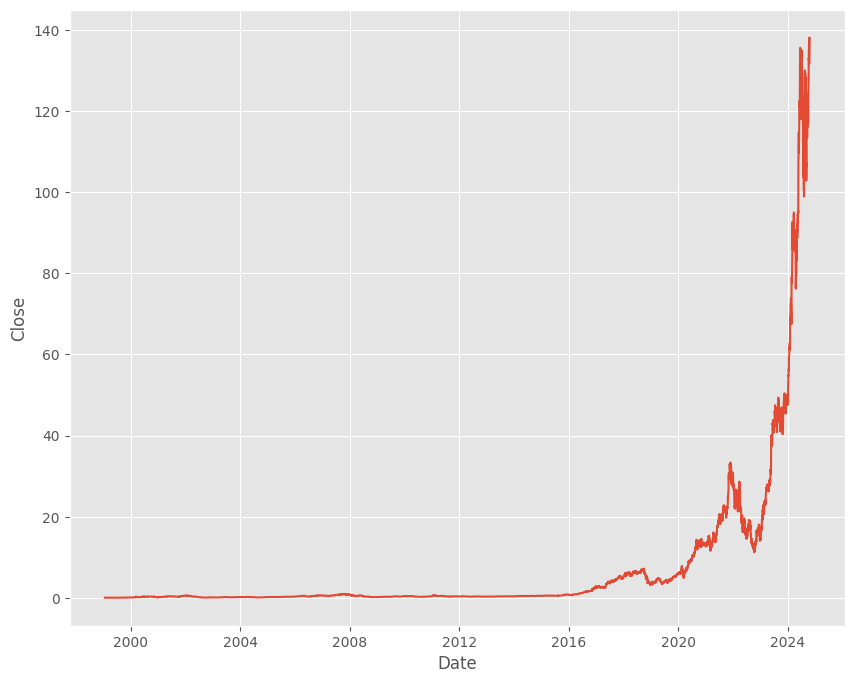

In [33]:
plt.figure(figsize=(10, 8))
sns.lineplot(y=df.Close, x=df.index)
plt.show()

## Data Preproecssing

In [35]:
df['Tomorrow'] = df['Close'].shift(-1)
df["Target"] = (df['Tomorrow'] > df['Close']).astype(int)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2024-10-14,136.470001,139.600006,136.300003,138.070007,138.070007,232347700,131.600006,0
2024-10-15,137.869995,138.570007,128.740005,131.600006,131.600006,377831000,135.720001,1
2024-10-16,133.979996,136.619995,131.580002,135.720001,135.720001,264879700,136.929993,1
2024-10-17,139.339996,140.889999,136.869995,136.929993,136.929993,306435900,138.000000,1
2024-10-18,138.669998,138.899994,137.279999,138.000000,138.000000,175800600,NaN,0


In [36]:
df = df.loc['1990-01-01':].copy()

In [37]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037618,2714688000,0.045313,1
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041559,510480000,0.041797,0
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038334,343200000,0.041667,0
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038215,244368000,0.041536,0
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038095,227520000,0.039583,0
...,...,...,...,...,...,...,...,...
2024-10-14,136.470001,139.600006,136.300003,138.070007,138.070007,232347700,131.600006,0
2024-10-15,137.869995,138.570007,128.740005,131.600006,131.600006,377831000,135.720001,1
2024-10-16,133.979996,136.619995,131.580002,135.720001,135.720001,264879700,136.929993,1


## Model Training

In [38]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=100, random_state=77)
train = df.iloc[:-100]
test = df.iloc[-100:]

In [39]:
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=300, random_state=77)

In [40]:
predictions = model.predict(test[predictors])
predictions = pd.Series(predictions, index=test.index)
predictions

Date
2024-05-29    1
2024-05-30    1
2024-05-31    1
2024-06-03    1
2024-06-04    1
             ..
2024-10-14    1
2024-10-15    1
2024-10-16    1
2024-10-17    1
2024-10-18    0
Length: 100, dtype: int64

In [41]:
score = precision_score(test['Target'], predictions)
score

np.float64(0.5360824742268041)

In [44]:
combined = pd.concat([test['Target'], predictions], axis=1)
combined.columns = ['Target', 'Preds']
combined

,Target,Preds
Date,,
2024-05-29,0,1
2024-05-30,0,1
2024-05-31,1,1
2024-06-03,1,1
2024-06-04,1,1
...,...,...
2024-10-14,0,1
2024-10-15,1,1
2024-10-16,1,1


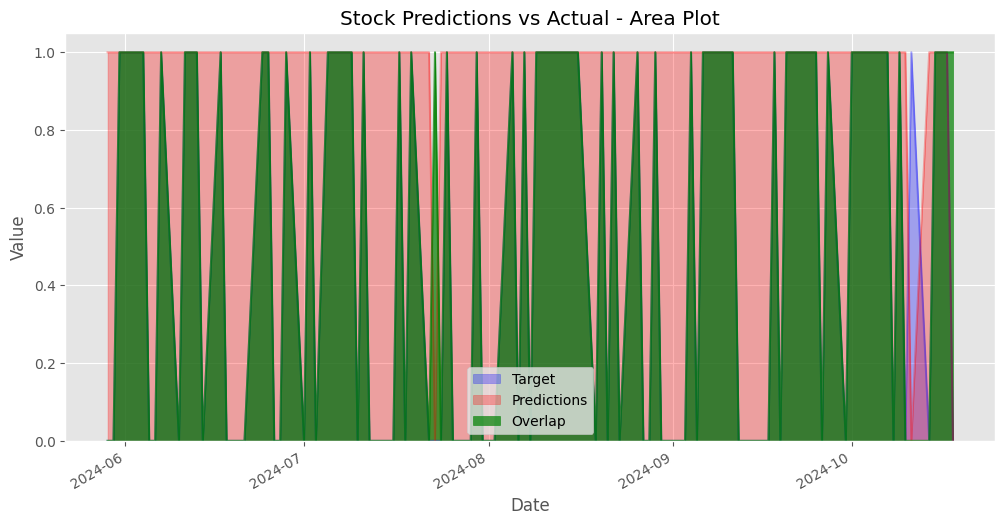

In [71]:
plt.figure(figsize=(12, 6))
combined['Target'].plot(kind='area', color='blue', alpha=0.3, label='Target')
combined['Preds'].plot(kind='area', color='red', alpha=0.3, label='Predictions')
# Calculate overlap (yellow area)
overlap = (combined['Target'] == combined['Preds']).astype(int)
overlap.plot(kind='area', color='green', alpha=0.7, label='Overlap')

plt.title('Stock Predictions vs Actual - Area Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### Building a backtesting system

In [72]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    predictions = model.predict(test[predictors])
    predictions = pd.Series(predictions, index=test.index, name='Preds')
    combined = pd.concat([test['Target'], predictions], axis=1)

    return combined

In [73]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)
    

In [74]:
predictions = backtest(df, model, predictors)

In [76]:
predictions['Preds'].value_counts()

Preds
0    2324
1    1654
Name: count, dtype: int64

In [77]:
precision_score(predictions['Target'], predictions['Preds'])

np.float64(0.5193470374848851)

In [78]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.529915
0    0.470085
Name: count, dtype: float64

### Add more predictors

In [79]:
horizons = [2, 5, 60, 250, 1000]

In [80]:
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_{horizon}'
    df[ratio_column] = df['Close'] / rolling_averages['Close']

    trend_column = f'Trend_{horizon}'
    df[trend_column] = df.shift(1).rolling(horizon).sum()['Target']

    new_predictors += [ratio_column, trend_column]

In [82]:
df = df.dropna()

In [83]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2003-01-15,0.103083,0.103917,0.099833,0.099833,0.091562,904584000,0.093083,0,0.984386,1.0,0.979717,3.0,0.906372,32.0,0.453885,104.0,0.474865,470.0
2003-01-16,0.098333,0.099583,0.091750,0.093083,0.085371,2039976000,0.089583,0,0.965011,0.0,0.928511,2.0,0.844110,31.0,0.426599,104.0,0.442657,469.0
2003-01-17,0.090583,0.091833,0.088417,0.089583,0.082161,1058832000,0.087333,0,0.980839,0.0,0.918331,1.0,0.812207,30.0,0.413811,104.0,0.425916,469.0
2003-01-21,0.091250,0.093167,0.087083,0.087333,0.080097,967356000,0.087417,1,0.987282,0.0,0.923510,1.0,0.792346,29.0,0.406730,103.0,0.415129,469.0
2003-01-22,0.087083,0.089667,0.086833,0.087417,0.080174,550992000,0.089833,1,1.000481,1.0,0.955901,1.0,0.793078,30.0,0.410637,103.0,0.415437,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-11,134.009995,135.779999,133.660004,134.800003,134.800003,170209500,138.070007,1,0.999963,1.0,1.016791,3.0,1.145567,32.0,1.534354,143.0,3.466761,539.0
2024-10-14,136.470001,139.600006,136.300003,138.070007,138.070007,232347700,131.600006,0,1.011984,1.0,1.025445,3.0,1.170019,33.0,1.565020,143.0,3.539521,540.0
2024-10-15,137.869995,138.570007,128.740005,131.600006,131.600006,377831000,135.720001,1,0.976008,1.0,0.979269,2.0,1.113923,32.0,1.485778,143.0,3.363463,540.0


### Improving the model

In [84]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=50, random_state=77)

In [85]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    predictions = model.predict_proba(test[predictors])[:,1]
    predictions[predictions >= .6] = 1
    predictions[predictions < .6] = 0
    
    predictions = pd.Series(predictions, index=test.index, name='Preds')
    combined = pd.concat([test['Target'], predictions], axis=1)

    return combined

In [86]:
predictions = backtest(df, model, new_predictors)

In [87]:
predictions['Preds'].value_counts()

Preds
0.0    2725
1.0     252
Name: count, dtype: int64

In [89]:
precision_score(predictions['Target'], predictions['Preds'])

np.float64(0.5952380952380952)

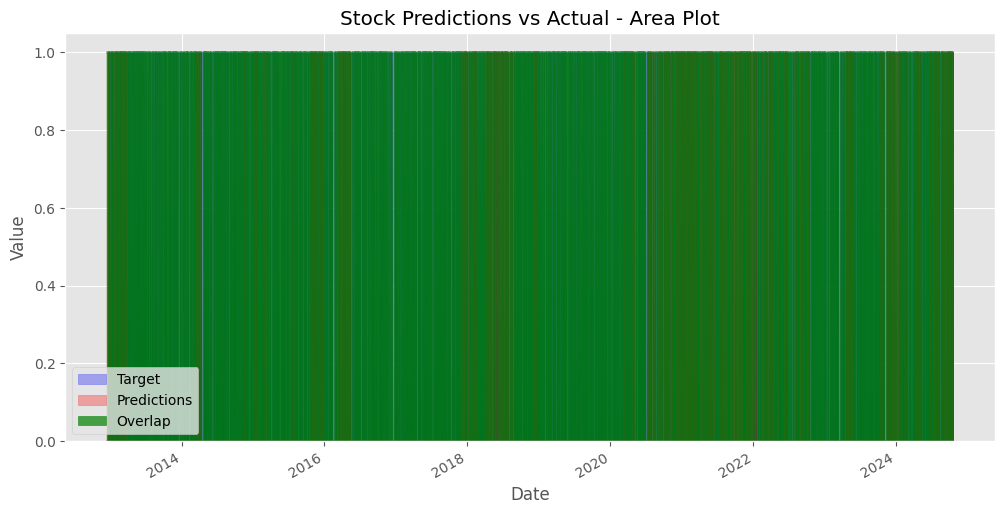

In [91]:
plt.figure(figsize=(12, 6))
predictions['Target'].plot(kind='area', color='blue', alpha=0.3, label='Target')
predictions['Preds'].plot(kind='area', color='red', alpha=0.3, label='Predictions')
# Calculate overlap (yellow area)
overlap = (predictions['Target'] == predictions['Preds']).astype(int)
overlap.plot(kind='area', color='green', alpha=0.7, label='Overlap')

plt.title('Stock Predictions vs Actual - Area Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

**This is really good!**